In [2]:

# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Files
import logging

logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='model.log',
    format='%(asctime)s - %(levelname)s - %(message)s')

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Loading DataSet 

In [4]:
# DataSet 
url="https://raw.githubusercontent.com/MontyVasita18/CodeB_Internship/refs/heads/main/dataset_phishing.csv"
df=pd.read_csv(url)
df.sample(frac=1) # To make the code execution faster

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
10734,https://support-appleld.com.secureupdate.duila...,127,50,1,4,1,0,1,2,0,3,2,0,0,4,0,1,0,0,0,0,0,1,0,0,0,0.157480,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,13,2,2,3,2,17,13,17,7.769231,8.4,7.375000,0,0,0,0,0,0,51,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.0,0,100.000000,0.000000,0,0,0,100.000000,0,0,0,1,1,0,25,3992,5697976,0,1,0,phishing
8265,https://vbf9iuherwiu.wl.r.appspot.com/linkedre...,58,29,0,5,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.017241,0.034483,0,0,0,0,0,3,0,0,1,0,0,0,6,1,1,1,4,15,12,15,6.833333,5.5,9.500000,0,0,0,0,0,0,21,0.190476,0.809524,0,1,0,0.176471,0,0.000000,0,1,0.0,0,20.000000,80.000000,0,0,0,25.000000,0,0,0,1,1,0,228,5616,0,0,1,5,phishing
3819,http://houdektranslations.wz.cz/786//?sec=Dani...,58,24,0,2,0,0,1,0,0,1,0,0,1,5,0,1,0,0,0,1,0,0,1,0,1,0.086207,0.000000,0,0,0,0,0,2,0,1,0,0,0,0,6,0,2,2,3,18,18,9,6.833333,10.0,5.250000,0,0,0,0,0,0,1,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.0,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,0,0,-1,-1,48274,0,1,2,phishing
7671,http://superbahisgir2.blogspot.com,34,27,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.029412,0.037037,0,0,0,0,0,2,0,0,1,0,1,0,2,0,8,8,0,14,14,0,11.000000,11.0,0.000000,0,1,0,0,0,0,14,0.071429,0.928571,0,0,0,0.846154,0,0.615385,0,1,0.0,0,0.000000,0.000000,0,0,0,14.285714,0,0,0,1,0,0,374,7295,0,0,1,5,phishing
3836,https://jikatel.com/pay/ee/,27,11,0,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,3,1,2,7,2,7,7,3,4.000000,7.0,2.500000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.0,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,0,0,347,5495,0,0,1,0,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,https://www.onlineocr.net,25,17,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,9,9,0,6.000000,6.0,0.000000,0,0,0,0,0,0,49,0.959184,0.040816,0,0,0,0.500000,0,0.000000,0,0,100.0,0,50.000000,50.000000,0,0,0,0.000000,0,0,0,1,1,0,1658,4185,3911,0,0,5,legitimate
5288,https://www.cnet.com/internet-speed-test/,41,12,0,2,2,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,1,1,0,2,0,5,4,3,3,4,8,4,8,4.800000,3.5,5.666667,0,1,0,0,0,0,367,0.498638,0.501362,0,2,0,0.413043,0,0.005435,0,1,0.0,0,42.105263,57.894737,0,0,0,0.000000,0,0,0,0,1,0,228,9635,148,0,1,7,legitimate
6172,http://nef.com.pk/wp-includes/certificates/red...,59,10,0,3,1,0,1,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,1,1,0,0,0,0,6,0,2,3,2,12,3,12,6.500000,3

In [5]:
logging.info('Data loading started')

In [6]:
df.shape

(11430, 89)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [8]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

In [9]:
df['url'].nunique()

11429

In [10]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

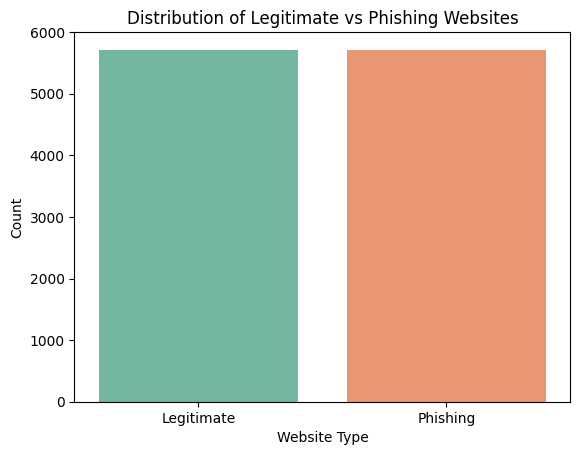

In [11]:
sns.countplot(x='status', data=df, palette='Set2')
plt.title('Distribution of Legitimate vs Phishing Websites')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.xlabel('Website Type')
plt.ylabel('Count')
plt.show()


In [12]:
# Replacing value of status Column
# legitimate : 0 and phishing : 1
df['status']=df['status'].replace({'legitimate':0,'phishing':1})

df['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['url']=le.fit_transform(df['url'])

df['url'].value_counts()

url
1065     2
4501     1
10779    1
1315     1
9201     1
        ..
6539     1
819      1
9629     1
5956     1
62       1
Name: count, Length: 11429, dtype: int64

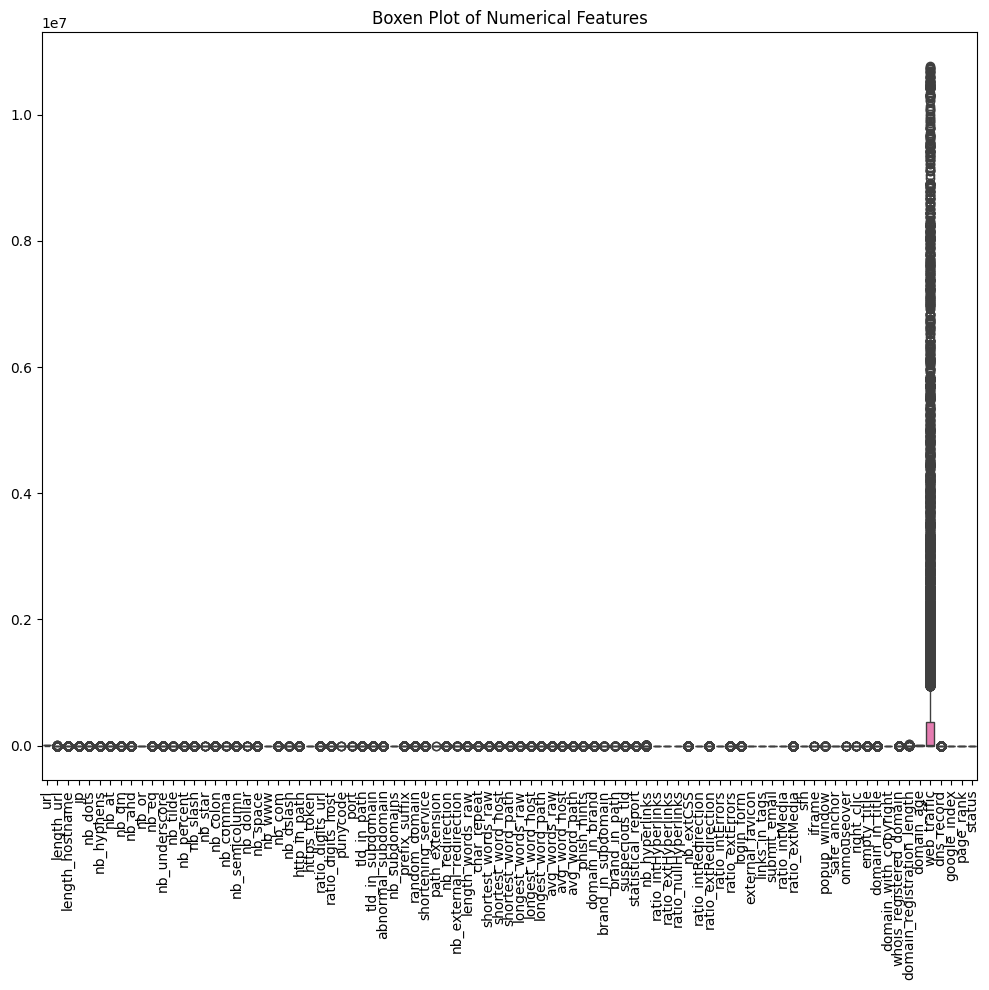

In [14]:
# Checking BoxenPlot 
plt.figure(figsize=(10, 10))
sns.boxplot(data= df)

plt.xticks(rotation = 90)  
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()

In [15]:
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'url'.
Replaced 620 outliers in 'length_url' with median.
Replaced 775 outliers in 'length_hostname' with median.
Replaced 1721 outliers in 'ip' with median.
Replaced 567 outliers in 'nb_dots' with median.
Replaced 1371 outliers in 'nb_hyphens' with median.
Replaced 245 outliers in 'nb_at' with median.
Replaced 1555 outliers in 'nb_qm' with median.
Replaced 761 outliers in 'nb_and' with median.
No outliers found in 'nb_or'.
Replaced 1564 outliers in 'nb_eq' with median.
Replaced 1695 outliers in 'nb_underscore' with median.
Replaced 76 outliers in 'nb_tilde' with median.
Replaced 355 outliers in 'nb_percent' with median.
Replaced 401 outliers in 'nb_slash' with median.
Replaced 8 outliers in 'nb_star' with median.
Replaced 197 outliers in 'nb_colon' with median.
Replaced 24 outliers in 'nb_comma' with median.
Replaced 248 outliers in 'nb_semicolumn' with median.
Replaced 11 outliers in 'nb_dollar' with median.
Replaced 210 outliers in 'nb_space' with median.
No out

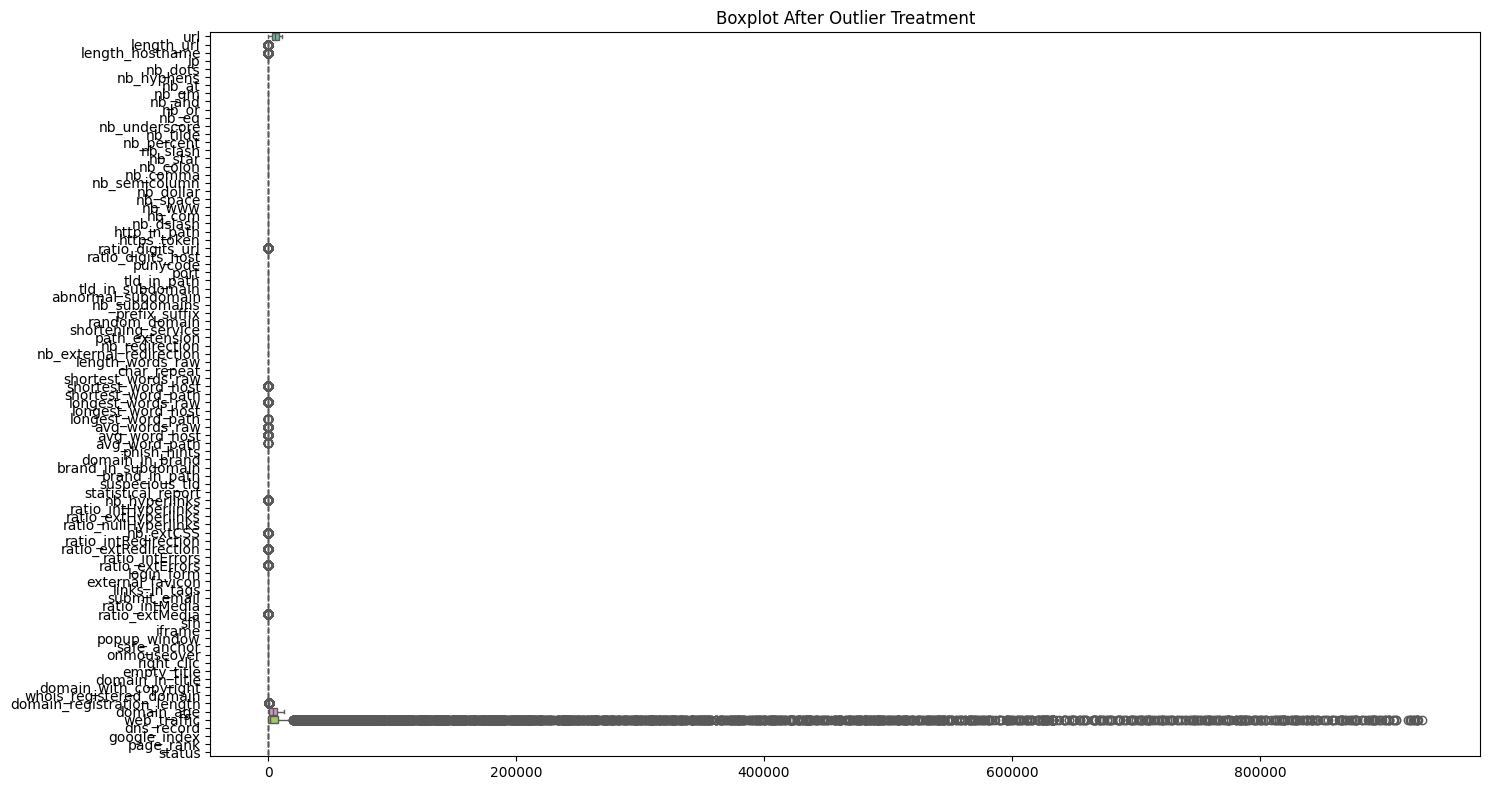

In [16]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
# Using PCA Concept:

# Step 1: Standardize the data

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['status'], how = 'left')

pca_df


Explained Variance Ratio: [0.57046592 0.970943  ]
Number of components selected: 2


,PC1,PC2,status
0,-7.873171,-5.366775,0
1,-6.311023,14.559213,1
2,-7.736537,-5.395951,1
3,5.910682,-2.885161,0
4,-6.772865,-5.403439,0
...,...,...,...
11425,-1.094859,73.295599,0
11426,-7.901367,-5.380939,1
11427,-7.912587,-5.342337,0
11428,-7.664649,-5.369196,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Model Building
X=pca_df.drop(columns='status')
y=df['status']


X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.70,random_state=42)


In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)

accuracy_score(y_test,y_pred_rfc)

0.8440233236151603

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  # Make sure this is the function

# Train the model
dfc = DecisionTreeClassifier()
dfc.fit(X_train, y_train)

# Predict
y_pred_dc = dfc.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_dc)
print("Accuracy:", accuracy)


Accuracy: 0.7979591836734694


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the model
rfc = RandomForestClassifier()

# Perform 10-fold cross-validation
scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')

# Output results
print("Accuracy scores for each fold:", scores)
print("Average Accuracy:", np.mean(scores))


Accuracy scores for each fold: [0.85826772 0.84339458 0.8600175  0.86789151 0.83639545 0.84164479
 0.83814523 0.84426947 0.84689414 0.86701662]
Average Accuracy: 0.8503937007874015


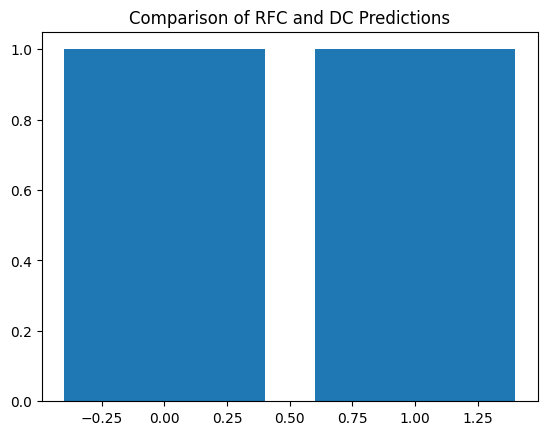

In [23]:
import matplotlib.pyplot as plt

plt.bar(y_pred_rfc, y_pred_dc,)
plt.title('Comparison of RFC and DC Predictions')
plt.show()
